### 강의에서 사용된 파이썬 주요 기능

- 이벤트 위치 정적 시각화
  - matplotlib.pyplot.scatter: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
  - matplotlib.pyplot.arrow: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.arrow.html
  - matplotlib.pyplot.savefig: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html

- 이벤트 위치 반응형 시각화
  - plotly.graph_objects.Scatter: https://plotly.com/python-api-reference/generated/plotly.graph_objects.Scatter.html
  - plotly.graph_objects.Figure: https://plotly.com/python-api-reference/generated/plotly.graph_objects.Figure.html

- 이벤트 히트맵 시각화
  - pandas.concat: https://pandas.pydata.org/docs/reference/api/pandas.concat.html
  - numpy.histogram2d: https://numpy.org/doc/stable/reference/generated/numpy.histogram2d.html
  - matplotlib.pyplot.imshow: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
  - matplotlib.pyplot.colorbar: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html
  - matplotlib colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html
  - matplotlib.axes.Axes.tick_params: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html

### 경기 데이터 불러오기

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from src.plot_utils import *

In [2]:
match_id = 2057988
match_events = pd.read_pickle(f'data/refined_events/World_Cup/{match_id}.pkl')
match_events

,match_id,event_id,period,time,team_id,team_name,player_id,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y
0,2057988,260662125,1H,1.157,3148,Germany,3319,M. Özil,Pass,Simple pass,[Accurate],52.00,34.68,39.52,36.04
1,2057988,260662126,1H,2.669,3148,Germany,14723,T. Kroos,Pass,Simple pass,[Accurate],39.52,36.04,46.80,32.64
2,2057988,260662127,1H,4.965,3148,Germany,3319,M. Özil,Pass,Simple pass,[Accurate],46.80,32.64,32.24,25.84
3,2057988,260662128,1H,8.096,3148,Germany,134383,N. Süle,Pass,Simple pass,[Accurate],32.24,25.84,38.48,32.64
4,2057988,260662129,1H,9.505,3148,Germany,14723,T. Kroos,Pass,Simple pass,[Accurate],38.48,32.64,27.04,24.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1659,2057988,260664023,2H,3213.652,3148,Germany,134383,N. Süle,Others on the ball,Touch,[],85.28,31.96,72.80,40.12
1660,2057988,260664025,2H,3216.522,3148,Germany,14723,T. Kroos,Pass,Simple pass,[Accurate],72.80,40.12,90.48,51.68
1661,2057988,260664027,2H,3218.856,3148,Germany,14732,T. Müller,Pass,Cross,"[Key pass, Right foot, High, Accurate]",90.48,51.68,96.72,36.72
1662,2057988,260664031,2H,3219.998,3148,Germany,14795,M. Hummels,Shot,Shot,"[Head/body, Opportunity, Position: Out high le...",96.72,36.72,104.00,34.00


### 이벤트 위치 정적 시각화(static plotting)

##### (1) plt.scatter 함수를 활용한 이벤트 위치 시각화

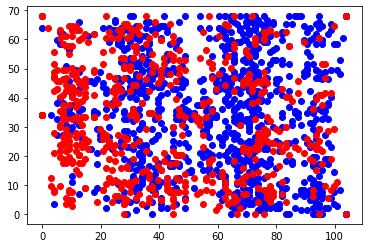

In [3]:
team1_name, team2_name = match_events['team_name'].unique()
team1_events = match_events[match_events['team_name'] == team1_name]
team2_events = match_events[match_events['team_name'] == team2_name]

plt.scatter(team1_events['start_x'], team1_events['start_y'], c='blue')
plt.scatter(team2_events['start_x'], team2_events['start_y'], c='red')
plt.show()

##### (2) 공개 코드를 이용한 경기장 이미지 시각화

(<Figure size 748.8x489.6 with 1 Axes>, <AxesSubplot:>)

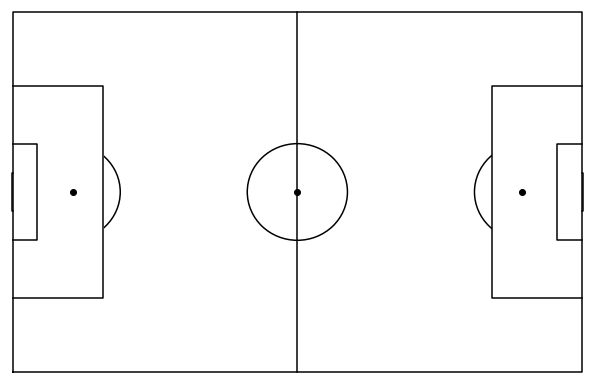

In [4]:
draw_pitch(pitch='white', line='black')

##### (3) 경기장 이미지 위에 이벤트 발생 위치 시각화 및 꾸미기

In [5]:
team2_events[['start_x', 'end_x']] = 104 - team2_events[['start_x', 'end_x']]
team2_events[['start_y', 'end_y']] = 68 - team2_events[['start_y', 'end_y']]

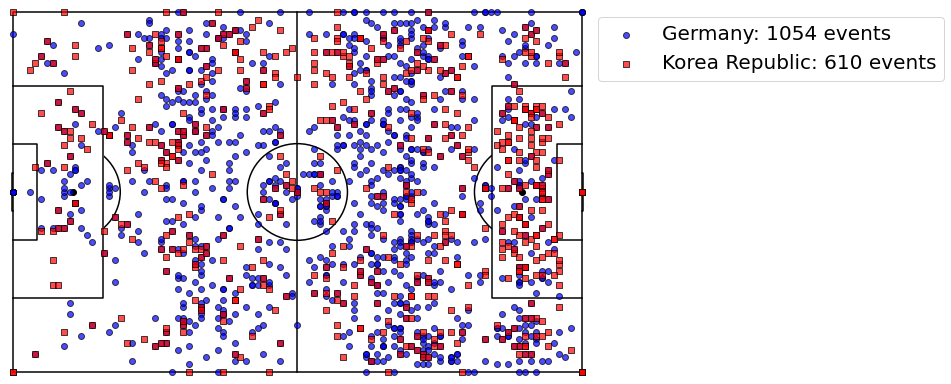

In [6]:
draw_pitch('white', 'black')

plt.scatter(
    team1_events['start_x'], team1_events['start_y'], c='blue', edgecolors='k', alpha=0.7,
    label=f'{team1_name}: {len(team1_events)} events'
)
plt.scatter(
    team2_events['start_x'], team2_events['start_y'], marker='s', c='red', edgecolors='k', alpha=0.7,
    label=f'{team2_name}: {len(team2_events)} events'
)
plt.legend(fontsize=20, bbox_to_anchor=(1, 1))

# plt.savefig('img/event_scatter.png', bbox_inches='tight')
plt.show()

##### (4) plt.arrow 함수를 활용한 패스 경로 시각화

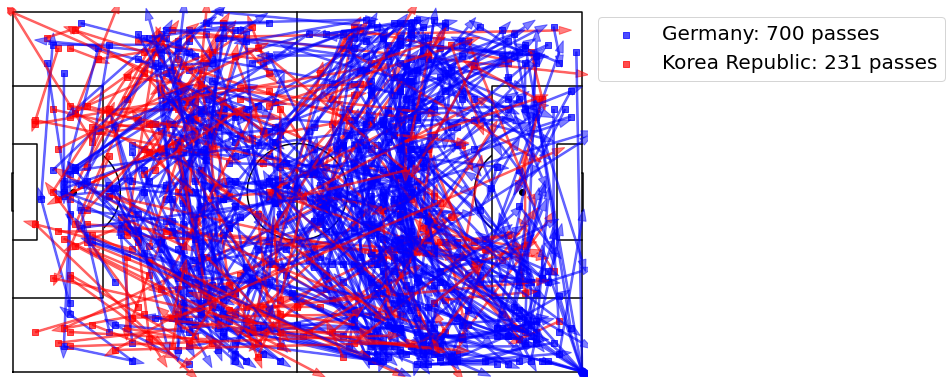

In [7]:
pass_records = match_events[
    (match_events['event_type'] == 'Pass') |
    (match_events['sub_event_type'].isin(['Free kick', 'Free kick cross', 'corner']))
]
team1_pass_records = pass_records[pass_records['team_name'] == team1_name]
team2_pass_records = pass_records[pass_records['team_name'] == team2_name]

draw_pitch('white', 'black')

plt.scatter(
    team1_pass_records['start_x'], team1_pass_records['start_y'], marker='s', c='blue', alpha=0.7,
    label=f'{team1_name}: {len(team1_pass_records)} passes'
)
plt.scatter(
    team2_pass_records['start_x'], team2_pass_records['start_y'], marker='s', c='red', alpha=0.7,
    label=f'{team2_name}: {len(team2_pass_records)} passes'
)

for i, record in pass_records.iterrows():
    x = record['start_x']
    y = record['start_y']
    dx = record['end_x'] - x
    dy = record['end_y'] - y
    color = 'blue' if record['team_name'] == team1_name else 'red'
    plt.arrow(x, y, dx, dy, width=0.3, head_width=1.5, color=color, alpha=0.5)

plt.legend(fontsize=20, bbox_to_anchor=(1, 1))

# plt.savefig('img/pass_arrow.png', bbox_inches='tight')
plt.show()

### 이벤트 위치 반응형 시각화(interactive plotting)

##### (1) go.Scatter 클래스를 활용한 이벤트 위치 반응형 시각화

In [8]:
match_events['display_time'] = match_events.apply(
    lambda x: f"{x['period']} {int(x['time'] // 60):02d}:{int(x['time'] % 60):02d}", axis=1
)
match_events

,match_id,event_id,period,time,team_id,team_name,player_id,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y,display_time
0,2057988,260662125,1H,1.157,3148,Germany,3319,M. Özil,Pass,Simple pass,[Accurate],52.00,34.68,39.52,36.04,1H 00:01
1,2057988,260662126,1H,2.669,3148,Germany,14723,T. Kroos,Pass,Simple pass,[Accurate],39.52,36.04,46.80,32.64,1H 00:02
2,2057988,260662127,1H,4.965,3148,Germany,3319,M. Özil,Pass,Simple pass,[Accurate],46.80,32.64,32.24,25.84,1H 00:04
3,2057988,260662128,1H,8.096,3148,Germany,134383,N. Süle,Pass,Simple pass,[Accurate],32.24,25.84,38.48,32.64,1H 00:08
4,2057988,260662129,1H,9.505,3148,Germany,14723,T. Kroos,Pass,Simple pass,[Accurate],38.48,32.64,27.04,24.48,1H 00:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1659,2057988,260664023,2H,3213.652,3148,Germany,134383,N. Süle,Others on the ball,Touch,[],85.28,31.96,72.80,40.12,2H 53:33
1660,2057988,260664025,2H,3216.522,3148,Germany,14723,T. Kroos,Pass,Simple pass,[Accurate],72.80,40.12,90.48,51.68,2H 53:36
1661,2057988,260664027,2H,3218.856,3148,Germany,14732,T. Müller,Pass,Cross,"[Key pass, Right foot, High, Accurate]",90.48,51.68,96.72,36.72,2H 53:38
1662,2057988,260664031,2H,3219.998,3148,Germany,14795,M. Hummels,Shot,Shot,"[Head/body, Opportunity, Position: Out high le...",96.72,36.72,104.00,34.00,2H 53:39


In [9]:
match_title = f'{team1_name} - {team2_name}'
label_func = lambda x: f"{x['event_type']} by {x['player_name']}, {x['display_time']}"

team1_events = match_events[match_events['team_name'] == team1_name]
team1_trace = go.Scatter(
    x=team1_events['start_x'],
    y=team1_events['start_y'],
    name=team1_name,
    text=team1_events.apply(label_func, axis=1),
    mode='markers',
    marker=dict(size=8, color='blue')
)

team2_events = match_events[match_events['team_name'] == team2_name]
team2_events[['start_x', 'end_x']] = 104 - team2_events[['start_x', 'end_x']]
team2_events[['start_y', 'end_y']] = 68 - team2_events[['start_y', 'end_y']]
team2_trace = go.Scatter(
    x=team2_events['start_x'],
    y=team2_events['start_y'],
    name=team2_name,
    text=team2_events.apply(label_func, axis=1),
    mode='markers',
    marker=dict(size=8, color='red', symbol='square')
)

fig = go.Figure(data=[team1_trace, team2_trace], layout=get_pitch_layout(match_title))
fig.show()

##### (2) 이벤트 위치 반응형 시각화 함수 구현

- 시각화 함수 정의

In [10]:
def plot_events(events, col_name, group_dict, event_type='all', rotate_team2_events=False):
    if event_type == 'all':
        match_title = f'{team1_name} - {team2_name}'
    else:
        events = events[events['event_type'] == event_type]
        match_title = f'{team1_name} - {team2_name} ({event_type})'

    if rotate_team2_events:
        events = events.copy()
        team2_idx = events['team_name'] == team2_name
        events.loc[team2_idx, ['start_x', 'end_x']] = 104 - events.loc[team2_idx, ['start_x', 'end_x']]
        events.loc[team2_idx, ['start_y', 'end_y']] = 68 - events.loc[team2_idx, ['start_y', 'end_y']]

    label_func = lambda x: f"{x['event_type']} by {x['player_name']}, {x['display_time']}"
    trace_list = []

    for group_name, color in group_dict.items():
        group_events = events[events[col_name] == group_name]
        trace = go.Scatter(
            x=group_events['start_x'],
            y=group_events['start_y'],
            text=group_events.apply(label_func, axis=1),
            mode='markers',
            marker=dict(size=8, color=color, symbol='square')
        )
        trace['name'] = group_name
        trace_list.append(trace)

    fig = go.Figure(data=trace_list, layout=get_pitch_layout(match_title))
    fig.show()

- 양팀 슈팅 위치 시각화

In [11]:
group_dict = {'Korea Republic': 'red', 'Germany': 'blue'}
plot_events(match_events, 'team_name', group_dict, event_type='Shot', rotate_team2_events=True)

- 주요 선수 패스 위치 시각화

In [12]:
match_events['player_name'].unique()

array(['M. Özil', 'T. Kroos', 'N. Süle', 'M. Neuer', 'S. Khedira',
       'M. Hummels', 'Seon-Min Moon', 'Ja-Cheol Koo', 'Young-Gwon Kim',
       'J. Hector', 'Jae-Sung Lee', 'Yong Lee', 'Son Heung-Min',
       'Woo-Young Jung', 'Young-Sun Yun', 'Chul Hong', 'J. Kimmich',
       'M. Reus', 'T. Werner', 'Hyun-Woo Cho', 'Hyun-Soo Jang',
       'L. Goretzka', 'Hwang Hee-Chan', 'M. Gómez', 'T. Müller',
       'Se-Jong Ju', 'J. Brandt', 'Yo-Han Go'], dtype=object)

In [13]:
group_dict = {
    'Son Heung-Min': 'red', 'Jae-Sung Lee': 'hotpink',
    'M. Hummels': 'blue', 'T. Kroos': 'black'
}
plot_events(match_events, col_name='player_name', group_dict=group_dict, event_type='Pass')

### 이벤트 히트맵 시각화

##### (1) 대회 전체 이벤트 데이터를 하나의 DataFrame으로 연결하기

In [18]:
dataset_name = 'World_Cup'
match_df = pd.read_csv(f'data/refined_events/{dataset_name}/matches.csv', index_col=0, encoding='utf-8-sig')
match_df

,gameweek,datetime,venue,team1_id,team1_name,team1_goals,team2_id,team2_name,team2_goals,duration
match_id,,,,,,,,,,
2057954,1,2018-06-14 15:00:00,Olimpiyskiy stadion Luzhniki,14358,Russia,5,16521,Saudi Arabia,0,Regular
2057955,1,2018-06-15 12:00:00,Stadion Central'nyj,16129,Egypt,0,15670,Uruguay,1,Regular
2057961,1,2018-06-15 15:00:00,Stadion Krestovskyi,16216,Morocco,0,10840,Iran,1,Regular
2057960,1,2018-06-15 18:00:00,Olimpiyskiy Stadion Fisht,9905,Portugal,3,1598,Spain,3,Regular
2057966,1,2018-06-16 10:00:00,Kazan' Arena,4418,France,2,8493,Australia,1,Regular
...,...,...,...,...,...,...,...,...,...,...
2058012,0,2018-07-07 18:00:00,Olimpiyskiy Stadion Fisht,14358,Russia,2,9598,Croatia,2,Penalties
2058014,0,2018-07-10 18:00:00,Stadion Krestovskyi,4418,France,1,5629,Belgium,0,Regular
2058015,0,2018-07-11 18:00:00,Olimpiyskiy stadion Luzhniki,9598,Croatia,2,2413,England,1,ExtraTime


In [23]:
match_events_list = []

for match_id in match_df.index:
    match_events = pd.read_pickle(f'data/refined_events/World_Cup/{match_id}.pkl')
    match_events_list.append(match_events)

events = pd.concat(match_events_list, ignore_index=True)
events

,match_id,event_id,period,time,team_id,team_name,player_id,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y
0,2057954,258612104,1H,1.656,16521,Saudi Arabia,122671,Mohammad Al Sahlawi,Pass,Simple pass,[Accurate],52.00,34.00,36.40,31.96
1,2057954,258612106,1H,4.488,16521,Saudi Arabia,139393,Abdullah Otayf,Pass,High pass,[Accurate],36.40,31.96,78.00,55.08
2,2057954,258612077,1H,5.937,14358,Russia,103668,I. Kutepov,Duel,Air duel,"[Won, Accurate]",26.00,12.92,38.48,11.56
3,2057954,258612112,1H,6.407,16521,Saudi Arabia,122940,Yasir Al Shahrani,Duel,Air duel,"[Lost, Not accurate]",78.00,55.08,65.52,56.44
4,2057954,258612110,1H,8.562,16521,Saudi Arabia,122847,Salman Al Faraj,Pass,Simple pass,[Accurate],65.52,56.44,73.84,57.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102508,2058017,263885652,2H,2978.302,9598,Croatia,3476,I. Rakitić,Pass,Simple pass,[Accurate],47.84,54.40,66.56,63.92
102509,2058017,263885653,2H,2979.085,9598,Croatia,14812,I. Perišić,Others on the ball,Touch,[],66.56,63.92,85.28,66.64
102510,2058017,263885654,2H,2983.449,9598,Croatia,14812,I. Perišić,Pass,Cross,"[Left foot, High, Not accurate]",85.28,66.64,104.00,0.00
102511,2058017,263885613,2H,2985.869,4418,France,25381,H. Lloris,Goalkeeper leaving line,Goalkeeper leaving line,[],0.00,68.00,18.72,1.36


##### (2) 선수별 이벤트 히트맵 그리기

- numpy.histogram2d 함수를 활용한 히트맵 산출

In [16]:
player_events = events[events['player_name'] == 'Son Heung-Min']
x = player_events['start_x']
y = player_events['start_y']
heatmap, xedges, yedges = np.histogram2d(y, x, bins=(3, 6), range=[[0, 68], [0, 104]])
heatmap, xedges, yedges

(array([[ 3.,  3.,  6., 16., 27., 22.],
        [ 4.,  1.,  2., 14., 27.,  9.],
        [ 2.,  7.,  6., 12., 14., 15.]]),
 array([ 0.        , 22.66666667, 45.33333333, 68.        ]),
 array([  0.        ,  17.33333333,  34.66666667,  52.        ,
         69.33333333,  86.66666667, 104.        ]))

- plt.imshow 함수를 활용한 히트맵 시각화

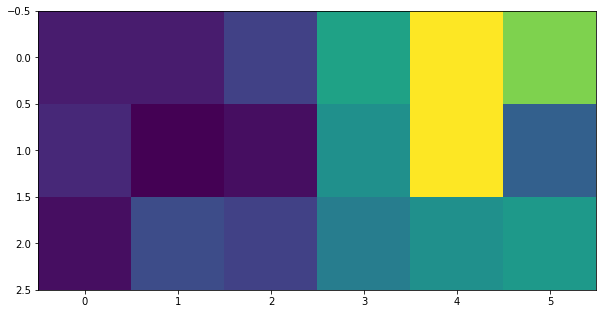

In [17]:
plt.figure(figsize=(10, 6))
plt.imshow(heatmap)

- 경기장 위에 히트맵 오버레이(overlay)

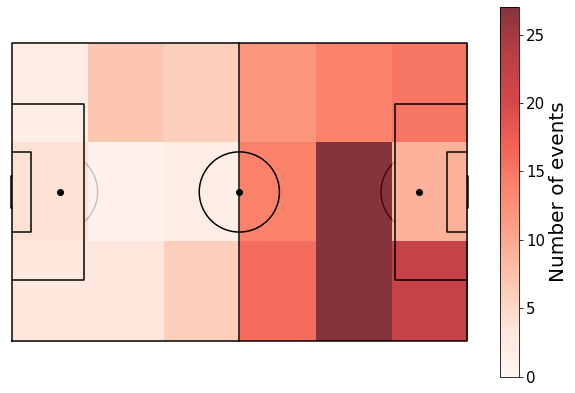

In [18]:
fig, ax = draw_pitch('white', 'black')

img = ax.imshow(heatmap[::-1], extent=[0, 104, 0, 68], vmin=0, cmap='Reds', alpha=0.8)
cbar = fig.colorbar(img, ax=ax)
cbar.ax.tick_params(labelsize=15)
cbar.set_label(label='Number of events', size=20)

# plt.savefig('img/player_event_heatmap.png', bbox_inches='tight')

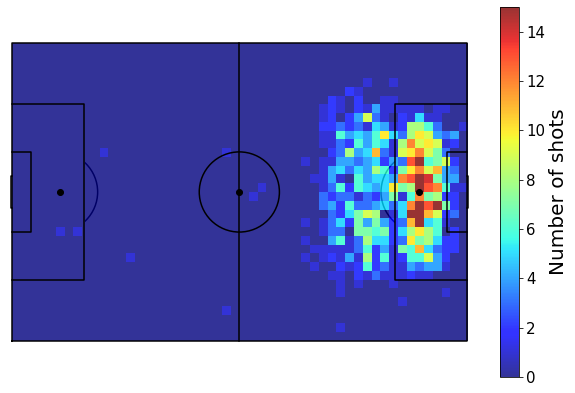

In [20]:
shot_records = events[events['event_type'] == 'Shot']
x = shot_records['start_x']
y = shot_records['start_y']
heatmap, xedges, yedges = np.histogram2d(y, x, bins=(34, 52), range=[[0, 68], [0, 104]])

fig, ax = draw_pitch('white', 'black')
img = ax.imshow(heatmap[::-1], extent=[0, 104, 0, 68], vmin=0, vmax=15, cmap='jet', alpha=0.8)

cbar = fig.colorbar(img, ax=ax)
cbar.ax.tick_params(labelsize=15)
cbar.set_label(label='Number of shots', size=20)

plt.savefig('img/shot_heatmap.png', bbox_inches='tight')